In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

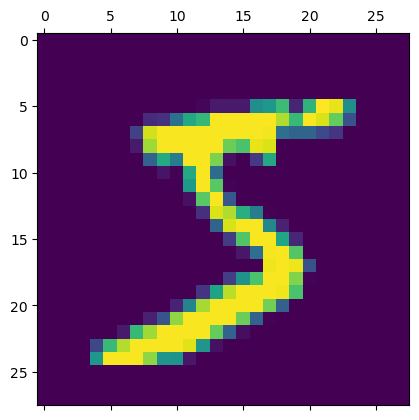

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [26]:
X_train=X_train/255
X_test=X_test/255

In [27]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [28]:
X_train_flattened.shape

(60000, 784)

In [29]:
X_test_flattened.shape

(10000, 784)

In [30]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
]) #stack of layers in neural network, each element will be treated as a layer. 
#Dense means all the layers are connected to each other. 10 is number of outputs, input is 784

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )#compile neural network with arguments, sparse means output variable is integer, if it is one hot encoded no need to use sparse
model.fit(X_train_flattened, y_train, epochs=5)  #epochs is number of iterations for which neural network will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.8132 - loss: 0.7198
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.9139 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.9198 - loss: 0.2837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9234 - loss: 0.2740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.9267 - loss: 0.2633


In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9130 - loss: 0.3055


[0.27149322628974915, 0.9243999719619751]

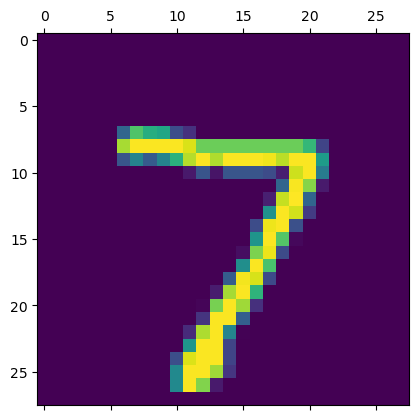

In [34]:
plt.matshow(X_test[0])

In [46]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


array([2.64406037e-02, 3.05247710e-07, 6.12620860e-02, 9.23009753e-01,
       2.77840416e-03, 1.06543966e-01, 1.37496522e-06, 9.99719620e-01,
       8.28435272e-02, 5.83799779e-01], dtype=float32)

In [48]:
np.argmax(y_predicted[0])  #So, np.argmax(predictions) is particularly useful after model.predict() when you want to convert the predicted probabilities into actual class labels for classification tasks.

7

In [51]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]  #finds label class for all predictions

In [53]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    1,    1,    4,    2,   12,    0],
       [   6,   10,  925,   13,   10,    2,   12,    9,   42,    3],
       [   5,    0,   26,  896,    2,   32,    2,   11,   30,    6],
       [   1,    1,    6,    0,  933,    0,    9,    3,   11,   18],
       [  11,    3,    4,   21,   13,  781,   15,    5,   35,    4],
       [  13,    3,    7,    0,    8,   11,  910,    2,    4,    0],
       [   1,    5,   24,    2,   10,    0,    0,  956,    3,   27],
       [   5,    8,    7,   14,    9,   16,    9,   13,  888,    5],
       [  10,    6,    1,    8,   51,    7,    0,   29,   14,  883]])>

Text(95.72222222222221, 0.5, 'Truth')

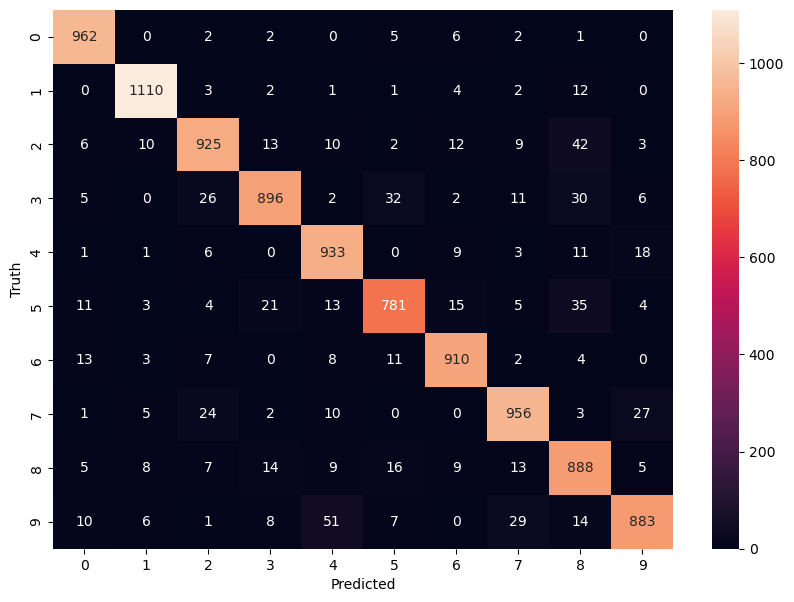

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot =True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #for hidden layer with 100 neurons
    keras.layers.Dense(10,activation='sigmoid')
]) 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )#compile neural network with arguments, sparse means output variable is integer, if it is one hot encoded no need to use sparse
model.fit(X_train_flattened, y_train, epochs=5)  #epochs is number of iterations for which neural network will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 676us/step - accuracy: 0.8723 - loss: 0.4564
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.9627 - loss: 0.1295
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9743 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9793 - loss: 0.0681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9844 - loss: 0.0509


In [57]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9709 - loss: 0.0901


[0.07942081987857819, 0.9750999808311462]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step


Text(95.72222222222221, 0.5, 'Truth')

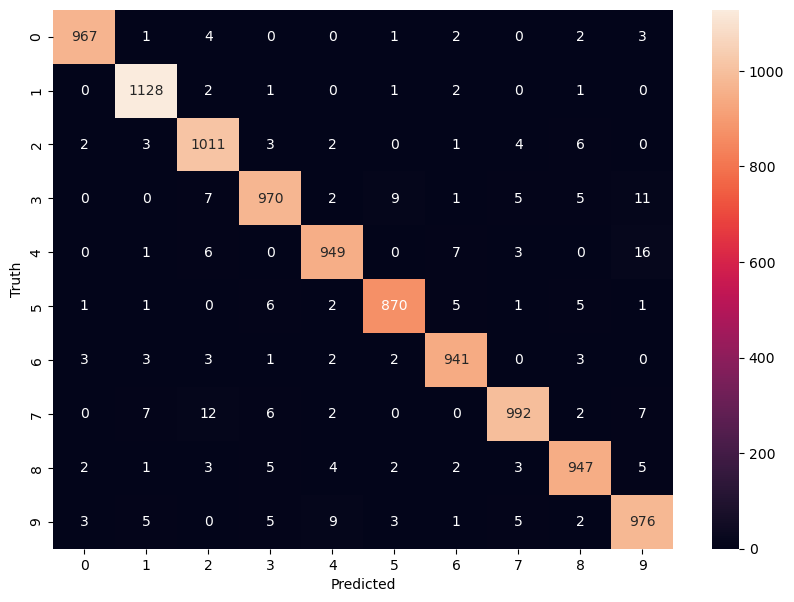

In [59]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot =True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')